In [207]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import math

In [208]:
K = 5                                                 # number of articles (arms)
user_types = ("female over 25", "male over 25" , "male under 25", "female under 25")  # possible different types of users
U = len(user_types)                                   # amount of different users
T = 1000                                              # horizon
N = 20

print("N =",N)
print(N*K*U) # exploration rounds

# click probabilities
true_click_probs = np.array([
    [0.8, 0.6, 0.5, 0.4, 0.2],      # female over 25
    [0.2, 0.4, 0.5, 0.6, 0.8],      # male over 25
    [0.2, 0.4, 0.8, 0.6, 0.5],      # male under 25
    [0.2, 0.4, 0.8, 0.6, 0.5]       # female under 25 (similar preferences)
    ])
best_article_list = [np.amax(us) for us in true_click_probs] # get the best possible arm for each user

N = 20
400


In [209]:
df = pd.DataFrame(
    true_click_probs,
    index=["Female over 25", "Male over 25", "Male under 25", "Female under 25"],
    columns=["Article 1 (p1)", "Article 2 (p2)", "Article 3 (p3)", "Article 4 (p4)", "Article 5 (p5)"]
)

In [210]:
df

,Article 1 (p1),Article 2 (p2),Article 3 (p3),Article 4 (p4),Article 5 (p5)
Female over 25,0.8,0.6,0.5,0.4,0.2
Male over 25,0.2,0.4,0.5,0.6,0.8
Male under 25,0.2,0.4,0.8,0.6,0.5
Female under 25,0.2,0.4,0.8,0.6,0.5


In [211]:
U = df.shape[0] # different type of users
K = df.shape[1] # number of articles
print(f"U = {U}\nK = {K}")

U = 4
K = 5


In [212]:
article_clicks_amount = np.ones(K) # gets the number of clicks for each article
sums_of_rewards = np.zeros(K) # sums of rewards for each arm
articles_clicked = [] #change to numpy           # array that hold the article that was clicked at each time
total_reward = 0

for user in range(U):    # for each user T = t -> T % U 
    article = 0
    max_upper_bound = 0
    for i in range(K):   # for each article
        # the more you select an article, you are more likely to not to select (diving by article's clicks)
        # although if while clicking you get a positive reward the greater the chances to click again
        average_reward = sums_of_rewards[i] / article_clicks_amount[i] # get the average reward 
        delta_i = math.sqrt(3/2 * math.log(user+1) / article_clicks_amount[i]) # get the delta_i
        current_upper_bound = average_reward + delta_i

        if current_upper_bound > max_upper_bound:
            max_upper_bound = current_upper_bound
            article = i 
        articles_clicked.append(article)
        article_clicks_amount[article] += 1
        reward = df.iloc[user, article]
        # print(reward)
        sums_of_rewards[article] += reward # if article is good, increase reward
        total_reward += reward

In [242]:
T=1000
random.seed(10)

In [251]:
article_clicks_amount = np.ones(K) # gets the number of clicks for each article
sums_of_rewards = np.zeros(K) # sums of rewards for each arm
articles_clicked = np.zeros(T) #change to numpy           # array that hold the article that was clicked at each time
total_reward = 0

for t in range(1, int(T/K)+1):    # for each user T = t -> T % U 
    article = 0
    max_upper_bound = 0
    for i in range(K):   # for each article
        # the more you select an article, you are more likely to not to select (diving by article's clicks)
        # although if while clicking you get a positive reward the greater the chances to click again
        average_reward = sums_of_rewards[i] / article_clicks_amount[i] # get the average reward 
        delta_i = math.sqrt(3/2 * math.log(t) / article_clicks_amount[i]) # get the delta_i
        current_upper_bound = average_reward + delta_i

        if current_upper_bound > max_upper_bound:
            max_upper_bound = current_upper_bound
            article = i 
        articles_clicked[t] = article
        article_clicks_amount[article] += 1
        reward = np.random.binomial(1,p=df.iloc[t%U, article])  # get a reward for arm j for current user
        # reward = df.iloc[t%U, article] # if possibilities were  { 0 , 1}
        #print(reward)
        sums_of_rewards[article] += reward # if article is good, increase reward
        total_reward += reward

In [250]:
total_reward

0

In [245]:
len(articles_clicked)

1000

In [246]:
# for article in articles_clicked:
#     print(article, end = " ")

In [247]:
from collections import Counter
Counter(articles_clicked)

Counter({0.0: 801, 2.0: 82, 4.0: 63, 3.0: 53, 1.0: 1})

Text(0, 0.5, 'Number of times article was clicked')

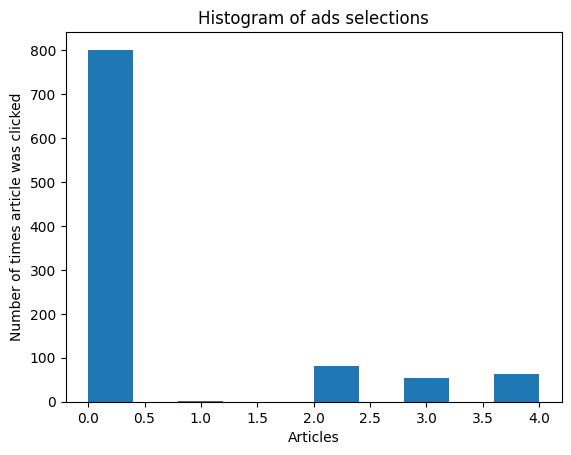

In [248]:
plt.hist(articles_clicked)
plt.title('Histogram of ads selections')
plt.xlabel('Articles')
plt.ylabel('Number of times article was clicked')